In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [22]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [37]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 69s 0us/step


In [42]:
x_train.shape

(50000, 32, 32, 3)

In [43]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [44]:
y_train.shape

(50000, 1)

In [48]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [51]:
y_train = y_train.reshape(-1,)
# -1 means to let the same number of samples but , means to change the 2 dimension array into one dimension
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

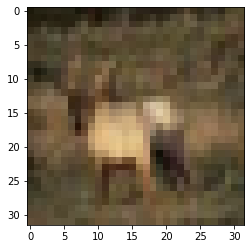

In [52]:
plt.imshow(x_train[3])

In [53]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [54]:
# the model work better by scaling the data between 0 - 1
x_train_flattend = x_train / 255
x_test_flattend = x_test / 255

In [58]:
ann = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train_flattend, y_train, epochs=5)
# sparse_categorical_crossentropy is used when the output is catigorical [1 or 2 or 3 ....]
# we use categorical_crossentropy when the output is categorical and hotencoded

Epoch 1/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.8556 - accuracy: 0.3366
Epoch 2/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6547 - accuracy: 0.4138
Epoch 3/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5653 - accuracy: 0.4463
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5039 - accuracy: 0.4690
Epoch 5/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4539 - accuracy: 0.4868s - loss: 1.4538 -  - ETA: 1s - loss: 1.4537 -  - ETA: 


In [ ]:
# ann is doing pretty bad and take a lot of time coputing so we will use cnn which is only adding more layers 
# for filtring the important data expl : nose and eyes in the face
# softmax is an activation functuion (sigmoid returns probability expl: 0.45 ==> softmax returns 0.45 / sum of probabilitys)
# in cnn we have convolutional layer which detect the important parts in the image 
# and we have pooling layer which reduces the size of the image (it helps the model to detect the object 
# even when they change their place)
# the beaty of cnn is that he fugurs ous the best filters on his own you just need to give the size and number of filters
# we often use relu activation for convolutional layers
# resum : convolution layer(relu) => pooling layer (relu) => dense layers  we can have as many (con + poling) layers as we want 

In [59]:
cnn = keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), 
#we can add pading="same" in Conv2D to add 1 px of padding so that the corner pixels don't get less attention than other center pixels  
# we can add strides=(x,x) to specifiy the steps of the filters in the image    
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train_flattend, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 38s 25ms/step - loss: 1.9209 - accuracy: 0.3128
Epoch 2/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5905 - accuracy: 0.4413
Epoch 3/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3994 - accuracy: 0.5053
Epoch 4/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2855 - accuracy: 0.5466
Epoch 5/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2126 - accuracy: 0.5724


In [60]:
cnn.evaluate(x_test_flattend,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.2739 - accuracy: 0.5458


[1.2738922834396362, 0.545799970626831]

In [61]:
cnn = keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train_flattend, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.6109 - accuracy: 0.4086
Epoch 2/5
1563/1563 [==============================] - 55s 36ms/step - loss: 1.2751 - accuracy: 0.5480
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1492 - accuracy: 0.5925
Epoch 4/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.0759 - accuracy: 0.6214
Epoch 5/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0138 - accuracy: 0.6439


In [62]:
cnn.evaluate(x_test_flattend,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0180 - accuracy: 0.6430


[1.0179697275161743, 0.6430000066757202]

In [65]:
y_pred = cnn.predict(x_test_flattend)
y_pred[:5]

array([[7.62322312e-03, 7.95053411e-03, 2.12426949e-02, 4.34327722e-01,
        4.65122471e-03, 1.17440395e-01, 6.51714355e-02, 2.46949680e-03,
        3.32866132e-01, 6.25707768e-03],
       [5.76005317e-02, 1.32180918e-02, 1.13186121e-04, 1.06757143e-05,
        3.11320036e-05, 2.21946365e-07, 2.57477154e-06, 1.34315924e-05,
        9.28135037e-01, 8.75095895e-04],
       [7.62696639e-02, 3.85497585e-02, 5.17795235e-03, 3.28257796e-03,
        1.69489568e-03, 3.25595349e-04, 4.83870332e-04, 9.55309311e-04,
        8.62444103e-01, 1.08162696e-02],
       [4.02486414e-01, 2.55424194e-02, 3.41182649e-02, 1.12752542e-02,
        2.40827212e-03, 5.94734622e-04, 9.89043037e-04, 2.47937278e-03,
        5.05677044e-01, 1.44291762e-02],
       [2.74343562e-04, 2.72338308e-04, 4.84900177e-02, 3.62176299e-02,
        6.03853881e-01, 1.00189531e-02, 3.00365180e-01, 3.92118905e-04,
        7.40385149e-05, 4.14761889e-05]], dtype=float32)

In [66]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

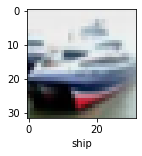

In [78]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
y_test = y_test.reshape(-1,)    
plot_sample(x_test_flattend, y_test,1)

In [79]:
classes[y_classes[1]]

'ship'